In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("goog.csv")

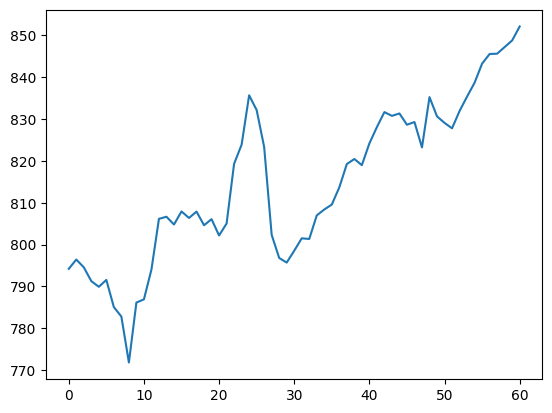

In [3]:
df_req = df['Close']
plt.plot(df_req)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_req = scaler.fit_transform(np.array(df_req).reshape(-1,1))

In [ ]:
training_size = int(len(df_req)*0.8)
df_train = df_req[:training_size, :]
df_test = df_req[training_size:len(df_req), :]

In [ ]:
# Creates time-series data:
def create_dataset(data, step=4):
    X = []
    y = []
    for i in range(len(data)-step):
        X.append(data[i:i+step, :])
        y.append(data[i, :])

    return np.array(X), np.array(y)

x_train, y_train = create_dataset(df_train)
x_test, y_test = create_dataset(df_test)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

e:\PICT\Semester VIII\Practicals\PICT_CourseWork_BE_2024-25\Semester 8\LP-V\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.2326
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1895
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1521
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1080
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0799
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0550
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0298
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0175
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0240
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0211
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0146
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0081
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

In [ ]:
metrics = model.evaluate(x_test, y_test)
metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step - loss: 0.0010


0.0010262387804687023

In [ ]:
y_pred = scaler.inverse_transform(model.predict(x_test))
y_test = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


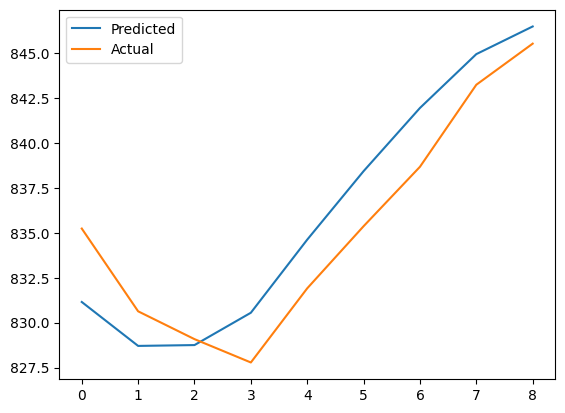

In [ ]:
plt.plot(y_pred, label="Predicted")
plt.plot(y_test, label="Actual")
plt.legend()